## Imports

In [1]:
#Do imports just once and for all
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, norm

from wordcloud import WordCloud

#instead of popup, plot images inline
%matplotlib inline

# SVD Analysis


In [2]:

path = "../src/files/"
s = np.load(path + "svd.s.npy")
Ut = np.load(path + "svd.Ut.npy")
V = np.load(path + "svd.V.npy")
k = np.load(path + "svd.k.npy")
docs = np.load(path + "svd.docs.npy")
vocab = np.load(path + "tfidf.vocab.npy")
SiUt = inv(np.diag(s)).dot(Ut)

## Scree-Plot

[1, array(100), 0, 386.93933]

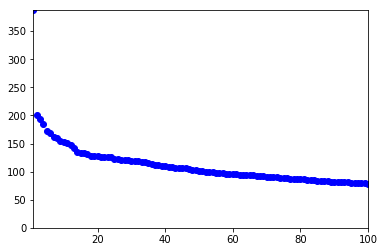

In [3]:
plt.plot(range(1,k+1),s[::-1], 'bo') #s is irgendwie falsch rum bei SVD Sparse -> [::-1] dreht den vector um
plt.axis([1, k, 0, s.max()])

## Word Clouds

In [4]:
topic = 1 #to select the correct row in Ut(topic-term) and column in V (doc-topic)
n = 50

##### Calculate Dict for Term Cloud
topic_terms_mask = np.argsort(Ut[topic,:])[::-1][:n]#Ut[topic,:] > 0
topic_terms_values = Ut[topic,topic_terms_mask]
topic_terms_vocab = vocab[topic_terms_mask]
topic_terms_dict = dict(zip(topic_terms_vocab, topic_terms_values))
#print(topic_terms_dict)

##### Calculate Dict for News Groups Cloud (based on Doc. Paths)
#Group Result By News Groups and sum there values
topic_docs_paths_ng = np.array([i.split('/')[0] for i in docs])
topic_docs_paths_ng_unique = np.unique(topic_docs_paths_ng)
topic_docs_values_sum = np.array([np.sum(V[topic_docs_paths_ng==ng,topic]) for ng in topic_docs_paths_ng_unique])

#Partition in positiv and negative
topic_docs_mask_pos = topic_docs_values_sum>0
topic_docs_mask_neg = topic_docs_values_sum<0

#Create Dict
topic_docs_dict_pos = dict(zip(topic_docs_paths_ng_unique[topic_docs_mask_pos], topic_docs_values_sum[topic_docs_mask_pos]))
topic_docs_dict_neg = dict(zip(topic_docs_paths_ng_unique[topic_docs_mask_neg], topic_docs_values_sum[topic_docs_mask_neg]*(-1)))
#print(topic_docs_dict)

### Influencing Terms

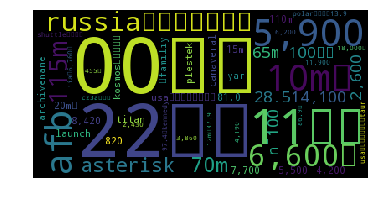

In [5]:
wordcloud = WordCloud().generate_from_frequencies(topic_terms_dict)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

### Positive Influencing News Groups

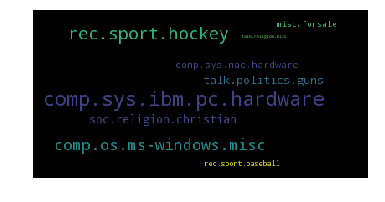

In [6]:
wordcloud = WordCloud().generate_from_frequencies(topic_docs_dict_pos)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

### Negative Influencing News Groups

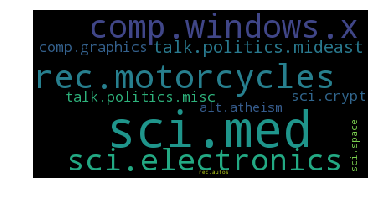

In [7]:
wordcloud = WordCloud().generate_from_frequencies(topic_docs_dict_neg)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

## TESTS

In [8]:
topic_docs_dict_neg

{'alt.atheism': 0.38274089,
 'comp.graphics': 0.45622957,
 'comp.windows.x': 0.83395612,
 'rec.autos': 0.0066056326,
 'rec.motorcycles': 0.89953464,
 'sci.crypt': 0.45227939,
 'sci.electronics': 0.81369954,
 'sci.med': 2.4566898,
 'sci.space': 0.19421384,
 'talk.politics.mideast': 0.75493109,
 'talk.politics.misc': 0.45748284}

In [9]:
topic_docs_dict_pos

{'comp.os.ms-windows.misc': 0.66899854,
 'comp.sys.ibm.pc.hardware': 1.1238799,
 'comp.sys.mac.hardware': 0.20538598,
 'misc.forsale': 0.14979191,
 'rec.sport.baseball': 0.12804319,
 'rec.sport.hockey': 0.74950886,
 'soc.religion.christian': 0.34585914,
 'talk.politics.guns': 0.2922349,
 'talk.religion.misc': 0.014888193}